# Table of Contents
## Step 1. Importing libraries and data
## Step 2. Security implications
## Step 3. Regional segmentation
## Step 4. Exclusion flag for low-activity customers
## Step 5. Create customer profiles
## Step 6. Visualization of customer profiles
## Step 7. Aggregate variables on a customer-profile level for usage frequency and expenditure
## Step 8. Comparison of customer profiles across regions and departments
## Step 9. Visualizations to illustrate results
## Step 10. Export final data set

# Step 1. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create shortcut to import files from project folder

path = r'C:\Users\radav\OneDrive\Documents\Career Foundry\Data Analytics\Immersion\Achievement 4 Python Fundamentals\Instacart Basket Analysis'

In [3]:
# Import merged file

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Check output

df.shape

(32404859, 32)

In [5]:
df.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_since_prior_order,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-range product,Regular day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Regular day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid-range product,Slow day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


# Step 2. Security implications

### Data citation and reference to customer data not containing PII (personal identifiable information) added to report, since it was fabricated for the purpose of this training course.

# Step 3. Regional segmentation

In [6]:
# Identify unique states included in dataframe

df['state'].value_counts(dropna = False)

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [7]:
# Count number of unique state values

n = len(pd.unique(df['state']))
n

51

### District of Columbia included as a separate state/district

In [8]:
# Create lists of regions

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [9]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 
           'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [10]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 
         'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [11]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 
        'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Add new Region column to dataframe based on State

df['region'] = df['state'].apply(lambda x: 'Northeast' if x in Northeast else
                                          ('Midwest' if x in Midwest else
                                          ('South' if x in South else
                                          ('West' if x in West else np.nan))))

In [13]:
# Check output

df.shape

(32404859, 33)

In [14]:
df.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regular day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regular day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Slow day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [15]:
# Check frequency of new region column

df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [16]:
# Use crosstab to review the relationship between spending habits and different U.S. regions

crosstab_region = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [17]:
crosstab_region

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [18]:
# Copy crosstab to Excel for further analysis

crosstab_region.to_clipboard()

In [19]:
# Convert crosstab to percentages to facilitate comparisons across regions

crosstab_region_prop = pd.crosstab(index = df['region'], columns = df['spending_flag'], normalize = "index").mul(100).round(1)

In [20]:
crosstab_region_prop

spending_flag,High spender,Low spender
region,,
Midwest,2.1,97.9
Northeast,1.9,98.1
South,1.9,98.1
West,1.9,98.1


### My observation is that there is no meaningful difference in spending habits across regions. In each region, almost exactly 2% of total orders from customers in the region are from High Spenders. The Midwest has the highest percentage of orders from High Spenders at 2.1%, and the other regions all have 1.9% of total orders from High Spenders.

# Step 4. Create an exclusion flag for low-activity customers and exclude them from the data

In [21]:
# Create a new low-activity exclusion flag column using 'max_order' data and the loc function

df.loc[df['max_order'] >= 5, 'low_activity_exclusion_flag'] = 'No'
df.loc[df['max_order'] < 5, 'low_activity_exclusion_flag'] = 'Yes'

In [22]:
# Check frequency of new low activity exclusion flag column

df['low_activity_exclusion_flag'].value_counts(dropna = False)

low_activity_exclusion_flag
No     30964564
Yes     1440295
Name: count, dtype: int64

In [23]:
# Check accuracy of low-activity flag

df.groupby('low_activity_exclusion_flag').agg({'order_number': ['max']})

,order_number
,max
low_activity_exclusion_flag,
No,99
Yes,4


### The output is as expected with no low activity customers having more than 4 orders in total.

In [24]:
# Export the dataframe before excluding low-activity customers to preserve a record

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged_regions_all.pkl'))

In [25]:
# Exclude low-activity customers from the data per CFO request

df2 = df[df['low_activity_exclusion_flag'] != 'Yes']

In [26]:
# Check accuracy of revised low activity exclusion flag column

df2['low_activity_exclusion_flag'].value_counts(dropna = False)

low_activity_exclusion_flag
No    30964564
Name: count, dtype: int64

In [27]:
# Consistency check to identify if any new missing values in merged file

df2.isnull().sum()

user_id                                0
first_name                             0
surname                                0
gender                                 0
state                                  0
age                                    0
date_joined                            0
number_of_dependents                   0
fam_status                             0
income                                 0
order_id                               0
order_number                           0
orders_day_of_week                     0
order_hour_of_day                      0
days_since_prior_order           1661283
customer_status                        0
product_id                             0
add_to_cart_order                      0
reordered                              0
product_name                           0
aisle_id                               0
department_id                          0
prices                              4877
price_range_loc                        0
busiest_days    

In [28]:
# Create subset of missing values in 'days_since_prior_order' column for consistency check

df_nan_ords = df2[df2['days_since_prior_order'].isnull() == True]

In [29]:
# Check the value counts for order_number = 1 to confirm that missing values in days_since_prior_order column relate to customers' first orders where there are no prior orders

df2['order_number'].value_counts()[1]

1661283

In [30]:
# Check details of prices data using describe function to see if any outliers remain

df2['prices'].describe()

count    3.095969e+07
mean     7.790590e+00
std      4.240595e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

### The output confirms that the total missing values in the days_since_prior_order column relate to customers' first orders where there are no prior orders. The missing prices relate to earlier cleaning where outlier prices above 25 dollars were replaced by missing values in the data set.

In [31]:
# Consistency check for any duplicates in merged file

df_dups = df2[df2.duplicated()]

In [32]:
df_dups

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region,low_activity_exclusion_flag


### No duplicates detected. Consistency checks complete.

In [33]:
# Export the new dataframe excluding low-activity customers for further analysis

df2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

# Step 5. Create customer profiles

In [34]:
# Research family status counts

df2['fam_status'].value_counts(dropna = False)

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [35]:
# Research age distribution

df2['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [36]:
# Identify if any single parents in database

df2_single = df2[df2['fam_status'] == 'single']

In [37]:
df2_single['number_of_dependents'].value_counts(dropna = False)

number_of_dependents
0    5094410
Name: count, dtype: int64

In [38]:
# Research family status of customers with dependents

df_depend = df2[df2['number_of_dependents'] > 0]

In [39]:
df_depend['fam_status'].value_counts(dropna = False)

fam_status
married                             21743711
living with parents and siblings     1481172
Name: count, dtype: int64

### Only married customers and those living with parents and siblings have dependents.

In [40]:
df_no_depend = df2[df2['number_of_dependents'] == 0]

In [41]:
df_no_depend['fam_status'].value_counts(dropna = False)

fam_status
single              5094410
divorced/widowed    2645271
Name: count, dtype: int64

### Only single and divorced/widowed customers have no dependents.

In [42]:
# Establish a column for baby product purchases to enable further analysis to help classify a baby household customer profile

df2.loc[df2['department_id'] == 18, 'baby_product'] = 1
df2.loc[df2['department_id'] != 18, 'baby_product'] = 0

C:\Users\radav\AppData\Local\Temp\ipykernel_16792\1082498051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['department_id'] == 18, 'baby_product'] = 1


In [43]:
# Check output

pd.set_option('display.max_columns', 50)

In [44]:
df2.shape

(30964564, 35)

In [45]:
df2.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region,low_activity_exclusion_flag,baby_product
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,Existing,196,2,0,Soda,77,7,9.0,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,Existing,196,1,1,Soda,77,7,9.0,Mid-range product,Regular day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,Existing,196,2,1,Soda,77,7,9.0,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,Existing,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regular day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,Existing,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Slow day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0


In [46]:
# Check frequency of new baby product column

df2['baby_product'].value_counts(dropna = False)

baby_product
0.0    30554172
1.0      410392
Name: count, dtype: int64

In [47]:
# Check accuracy of new baby product column

df2['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

### The baby_product count matches the babies department (18) order count.

In [48]:
# Create a new column to derive the total number of baby product purchases by customer

df2['total_baby_product_orders'] = df2.groupby(['user_id'])['baby_product'].transform(np.sum)

C:\Users\radav\AppData\Local\Temp\ipykernel_16792\1227180472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_baby_product_orders'] = df2.groupby(['user_id'])['baby_product'].transform(np.sum)


In [49]:
# Check output

df2.shape

(30964564, 36)

In [50]:
df2['total_baby_product_orders'].value_counts(dropna = False)

total_baby_product_orders
0.0      21154311
1.0       1854726
2.0        953340
3.0        620708
4.0        496405
           ...   
148.0         654
160.0         616
173.0         612
276.0         526
236.0         501
Name: count, Length: 268, dtype: int64

In [51]:
# Check accuracy of output by analyzing baby product purchasers. Create dataframe for babies department purchases

df_baby_product_customers = df2[df2['department_id'] == 18]

In [52]:
df_baby_product_customers.head(60)

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region,low_activity_exclusion_flag,baby_product,total_baby_product_orders
961,82820,Shawn,Chung,Male,Virginia,26,1/1/2017,2,married,32072,2005868,15,4,10,30.0,Existing,18176,3,0,Organic Strawberry Yogurt & Fruit Snack,92,18,7.4,Mid-range product,Slow day,Most orders,19,Regular customer,6.740984,Low spender,11.0,Regular customer,South,No,1.0,3.0
962,82820,Shawn,Chung,Male,Virginia,26,1/1/2017,2,married,32072,2096371,16,2,8,12.0,Existing,18176,11,1,Organic Strawberry Yogurt & Fruit Snack,92,18,7.4,Mid-range product,Regular day,Fewest orders,19,Regular customer,6.740984,Low spender,11.0,Regular customer,South,No,1.0,3.0
1008,82820,Shawn,Chung,Male,Virginia,26,1/1/2017,2,married,32072,2096371,16,2,8,12.0,Existing,14904,10,0,Free & Clear Diapers,56,18,4.7,Low-range product,Regular day,Fewest orders,19,Regular customer,6.740984,Low spender,11.0,Regular customer,South,No,1.0,3.0
1902,516,Peter,Hunt,Male,Colorado,51,1/1/2017,2,married,146559,703825,72,5,18,6.0,Existing,38984,13,0,Kale & Spinach Superfood Puffs,92,18,6.0,Mid-range product,Regular day,Average orders,93,Loyal customer,8.300444,Low spender,4.5,Frequent customer,West,No,1.0,12.0
1903,516,Peter,Hunt,Male,Colorado,51,1/1/2017,2,married,146559,2431786,75,6,11,8.0,Existing,38984,8,1,Kale & Spinach Superfood Puffs,92,18,6.0,Mid-range product,Regular day,Most orders,93,Loyal customer,8.300444,Low spender,4.5,Frequent customer,West,No,1.0,12.0
1904,516,Peter,Hunt,Male,Colorado,51,1/1/2017,2,married,146559,2648057,76,6,13,7.0,Existing,38984,10,1,Kale & Spinach Superfood Puffs,92,18,6.0,Mid-range product,Regular day,Most orders,93,Loyal customer,8.300444,Low spender,4.5,Frequent customer,West,No,1.0,12.0
1905,516,Peter,Hunt,Male,Colorado,51,1/1/2017,2,married,146559,1643276,79,2,9,3.0,Existing,38984,5,1,Kale & Spinach Superfood Puffs,92,18,6.0,Mid-range product,Regular day,Most orders,93,Loyal customer,8.300444,Low spender,4.5,Frequent customer,West,No,1.0,12.0
1906,516,Peter,Hunt,Male,Colorado,51,1/1/2017,2,married,146559,2073402,83,4,7,2.0,Existing,38984,3,1,Kale & Spinach Superfood Puffs,92,18,6.0,Mid-range product,Slow day,Fewest orders,93,Loyal customer,8.300444,Low spender,4.5,Frequent customer,West,No,1.0,12.0
1907,516,Peter,Hunt,Male,Colorado,51,1/1/2017,2,married,146559,2884170,87,4,11,5.0,Existing,38984,8,1,Kale & Spinach Superfood Puffs,92,18,6.0,Mid-range product,Slow day,Most orders,93,Loyal customer,8.300444,Low spender,4.5,Frequent customer,West,No,1.0,12.0
1908,516,Peter,Hunt,Male,Colorado,51,1/1/2017,2,married,146559,2808160,92,3,7,2.0,Existing,38984,6,1,Kale & Spinach Superfood Puffs,92,18,6.0,Mid-range product,Slow day,Fewest orders,93,Loyal customer,8.300444,Low spender,4.5,Frequent customer,West,No,1.0,12.0


In [53]:
# Review details of total baby product orders

df_baby_product_customers.total_baby_product_orders.describe()

count    410392.000000
mean         68.505249
std          82.499876
min           1.000000
25%          16.000000
50%          41.000000
75%          89.000000
max         808.000000
Name: total_baby_product_orders, dtype: float64

### After reviewing some specific customer examples and the distribution of total baby product orders, there are some infrequent buyers of items in the babies department that may not have a baby in the household. I will assume any customer that has purchased 10 or more items from the babies department has a baby in the household for purposes of customer segmentation.

In [54]:
# For customers with dependents, I also want to use income for purposes of customer segmentation. 
# Review distribution of income levels.

df_with_dependents = df2[df2['number_of_dependents'] > 0]

In [55]:
df_with_dependents.income.describe()

count    2.322488e+07
mean     9.960224e+04
std      4.307319e+04
min      2.591100e+04
25%      6.728100e+04
50%      9.669600e+04
75%      1.280070e+05
max      5.939010e+05
Name: income, dtype: float64

### For purposes of customer segmentation, I will designate the bottom 25% of income levels for customers with dependents (rounded to nearest thousand dollars) as low-income (<67,000 dollars), the 25%-75% range as medium-income, and the top 25% as high-income (>128,000 dollars). This will enable targeted marketing to households with dependents based on income level (e.g. promote premium products with high income households). 

### For customers with no dependents, I will segment the customers based on age because industry research shows that millenials have different behavior in that they are more frequent online grocery shoppers than non-millenials. I will define a millenial as anyone born between 1980 and 2000, and since the data set is from 2017 I will assume anyone over 37 is a non-millenial. Divorced/widowed with no dependents will be treated as single.

### I will segment the customer base using the following profiles:
### 1. Single Millenial
### 2. Single Non-Millenial
### 3. Baby Household
### 4. High-income Family
### 5. Medium-income Family
### 6. Low-Income Family

In [56]:
# Create a new profile column using age, income, number of dependents, and type of purchase data

df2.loc[(df2['number_of_dependents'] == 0) & (df2['age'] <= 37), 'customer_profile'] = 'Single Millenial'
df2.loc[(df2['number_of_dependents'] == 0) & (df2['age'] > 37), 'customer_profile'] = 'Single Non-Millenial'
df2.loc[(df2['number_of_dependents'] > 0) & (df2['total_baby_product_orders'] >= 10), 'customer_profile'] = 'Baby Household'
df2.loc[(df2['number_of_dependents'] > 0) & (df2['total_baby_product_orders'] < 10) & (df2['income'] > 128000), 'customer_profile'] = 'High-income Family'
df2.loc[(df2['number_of_dependents'] > 0) & (df2['total_baby_product_orders'] < 10) & (df2['income'] <= 128000) & (df2['income'] >= 67000), 'customer_profile'] = 'Medium-income Family'
df2.loc[(df2['number_of_dependents'] > 0) & (df2['total_baby_product_orders'] < 10) & (df2['income'] < 67000), 'customer_profile'] = 'Low-income Family'

C:\Users\radav\AppData\Local\Temp\ipykernel_16792\2710465302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[(df2['number_of_dependents'] == 0) & (df2['age'] <= 37), 'customer_profile'] = 'Single Millenial'


In [57]:
# Check output

df2.shape

(30964564, 37)

In [58]:
df2.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region,low_activity_exclusion_flag,baby_product,total_baby_product_orders,customer_profile
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,Existing,196,2,0,Soda,77,7,9.0,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0,0.0,High-income Family
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,Existing,196,1,1,Soda,77,7,9.0,Mid-range product,Regular day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0,0.0,High-income Family
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,Existing,196,2,1,Soda,77,7,9.0,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0,0.0,High-income Family
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,Existing,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regular day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0,0.0,High-income Family
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,Existing,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Slow day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0,0.0,High-income Family


In [59]:
# Check frequency of new customer profile column

df2['customer_profile'].value_counts(dropna = False)

customer_profile
Medium-income Family    9879788
Single Non-Millenial    5333764
Low-income Family       5108467
High-income Family      4948781
Baby Household          3287847
Single Millenial        2405917
Name: count, dtype: int64

### Confirmation that all customers have been profiled in accordance with the categories applied.

# Step 6. Create a visualization to show the distribution of profiles

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Medium-income Family'),
  Text(1, 0, 'Single Non-Millenial'),
  Text(2, 0, 'Low-income Family'),
  Text(3, 0, 'High-income Family'),
  Text(4, 0, 'Baby Household'),
  Text(5, 0, 'Single Millenial')])

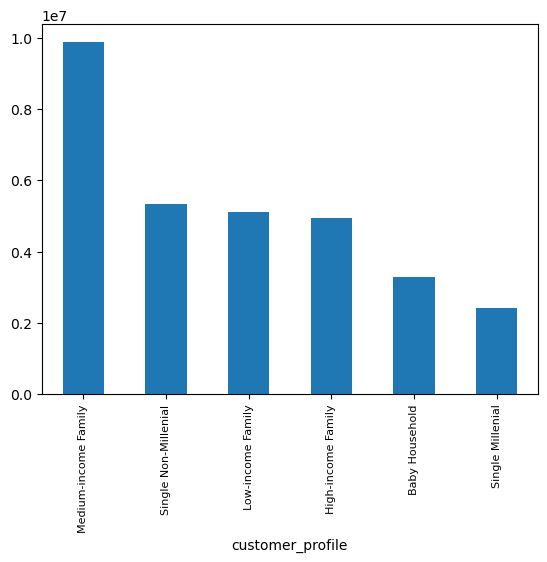

In [60]:
# Create a bar chart using customer profile and save as object

bar_profile = df2['customer_profile'].value_counts().plot.bar()
plt.xticks(fontsize = 8)

### Medium-income families have the most orders in the Instacart database, and single millenials have the fewest out of all the customer profile categories. 

In [61]:
# Export bar chart

bar_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'), bbox_inches='tight')

# Step 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [62]:
# Use agg function on customer profile column for usage frequency

df2.groupby('customer_profile').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                             mean min max
customer_profile                         
Baby Household          24.347774   1  99
High-income Family      16.656492   1  99
Low-income Family       16.566979   1  99
Medium-income Family    16.814619   1  99
Single Millenial        17.700724   1  99
Single Non-Millenial    18.073937   1  99

### Baby households  have significantly more average usage frequency than any other customer type. There does not appear to be much difference in usage frequency across families at different income levels. Surprisingly, single non-millenials have slightly higher usage frequency than single millenials.

In [63]:
# Use agg function on customer profile column for expenditure

df2.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                          mean  min   max
customer_profile                         
Baby Household        7.829574  1.0  25.0
High-income Family    7.965623  1.0  25.0
Low-income Family     7.256953  1.0  25.0
Medium-income Family  7.966745  1.0  25.0
Single Millenial      7.776934  1.0  25.0
Single Non-Millenial  7.795240  1.0  25.0

### There are small differences in average expenditure across customer type. As expected, low-income families have the lowest average expenditure. There is no difference in average expenditure between medium- and high-income families.

# Step 8. Compare your customer profiles with regions and departments

In [64]:
# Use crosstab to review the relationship between customer profiles and different U.S. regions

crosstab_region = pd.crosstab(df2['region'], df2['customer_profile'], dropna = False)

In [65]:
crosstab_region

customer_profile,Baby Household,High-income Family,Low-income Family,Medium-income Family,Single Millenial,Single Non-Millenial
region,,,,,,
Midwest,756935,1177141,1202975,2301646,553734,1269082
Northeast,594850,889371,882542,1743440,430504,923978
South,1096244,1619856,1706864,3306242,819701,1762232
West,839818,1262413,1316086,2528460,601978,1378472


In [66]:
# Copy crosstab to Excel for further analysis

crosstab_region.to_clipboard()

In [67]:
# Convert crosstab to percentages to facilitate comparisons across regions

crosstab_region_prop = pd.crosstab(index = df2['region'], columns = df2['customer_profile'], normalize = "index").mul(100).round(1)

In [68]:
crosstab_region_prop

customer_profile,Baby Household,High-income Family,Low-income Family,Medium-income Family,Single Millenial,Single Non-Millenial
region,,,,,,
Midwest,10.4,16.2,16.6,31.7,7.6,17.5
Northeast,10.9,16.3,16.1,31.9,7.9,16.9
South,10.6,15.7,16.6,32.1,7.9,17.1
West,10.6,15.9,16.6,31.9,7.6,17.4


### My observation is that there are very minimal differences in mix of customer profile across regions. For example, there is virtually an identical percentage of usage frequency from each customer profile in each region. We can conclude that there is not materially more prevalence of a particular customer type in any of the regions. 

In [69]:
# Import departments file to add department names to main dataframe

df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [70]:
# Merge dataframes to add department names

df_merged = df2.merge(df_departments, on = 'department_id')

In [71]:
# Check out

df_merged.shape

(30964564, 38)

In [72]:
df_merged.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_since_prior_order,order_frequency_flag,region,low_activity_exclusion_flag,baby_product,total_baby_product_orders,customer_profile,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,Existing,196,2,0,Soda,77,7,9.0,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0,0.0,High-income Family,beverages
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,Existing,196,1,1,Soda,77,7,9.0,Mid-range product,Regular day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0,0.0,High-income Family,beverages
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,Existing,196,2,1,Soda,77,7,9.0,Mid-range product,Busy day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,No,0.0,0.0,High-income Family,beverages
3,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,6,11,30.0,Existing,196,1,0,Soda,77,7,9.0,Mid-range product,Regular day,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,No,0.0,0.0,Single Millenial,beverages
4,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,1,20,16.0,Existing,196,6,1,Soda,77,7,9.0,Mid-range product,Busy day,Fewest orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,No,0.0,0.0,Single Millenial,beverages


In [73]:
# Re-run a prior analysis to find the mean orders by department instead of department id to answer a key project question

df_merged.groupby('department').agg({'order_number': ['mean']})

,order_number
,mean
department,
alcohol,16.034226
babies,19.867090
bakery,17.856619
beverages,17.901479
breakfast,17.469987
bulk,20.797555
canned goods,16.933858
dairy eggs,18.324695


In [74]:
# Use crosstab to review the relationship between customer profiles and different departments

crosstab_department = pd.crosstab(df_merged['department'], df_merged['customer_profile'], dropna = False)

In [75]:
crosstab_department

customer_profile,Baby Household,High-income Family,Low-income Family,Medium-income Family,Single Millenial,Single Non-Millenial
department,,,,,,
alcohol,3419,28960,26941,48480,11406,25421
babies,259718,12331,10597,24418,33151,70177
bakery,115635,187303,174506,361989,87912,193483
beverages,191236,411959,515212,808153,201615,443726
breakfast,68906,105024,125631,204857,51590,114842
bulk,3285,4913,6625,10628,2557,5443
canned goods,101186,174044,145923,339901,78910,172110
dairy eggs,583975,833684,799352,1665795,403187,891189
deli,98497,162984,164609,324362,78826,174556


In [76]:
# Copy crosstab to Excel for further analysis

crosstab_department.to_clipboard()

In [77]:
# Convert crosstab to proportions to facilitate comparisons across regions

crosstab_department_prop = pd.crosstab(index = df_merged['customer_profile'], columns = df_merged['department'], normalize = "index").mul(100).round(1)

In [78]:
crosstab_department_prop

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Baby Household,0.1,7.9,3.5,5.8,2.1,0.1,3.1,17.8,3.0,2.9,6.7,1.9,0.7,2.1,0.2,0.1,4.7,1.2,0.1,28.2,7.9
High-income Family,0.6,0.2,3.8,8.3,2.1,0.1,3.5,16.8,3.3,2.7,7.1,2.3,0.9,2.4,0.2,0.1,6.1,1.4,0.3,29.8,7.8
Low-income Family,0.5,0.2,3.4,10.1,2.5,0.1,2.9,15.6,3.2,2.3,6.6,2.4,0.8,1.6,0.2,0.1,5.5,1.4,0.3,27.4,12.9
Medium-income Family,0.5,0.2,3.7,8.2,2.1,0.1,3.4,16.9,3.3,2.7,7.0,2.3,0.9,2.4,0.2,0.1,6.1,1.4,0.3,30.4,7.8
Single Millenial,0.5,1.4,3.7,8.4,2.1,0.1,3.3,16.8,3.3,2.6,6.7,2.3,0.9,2.1,0.2,0.1,5.7,1.4,0.3,29.3,8.9
Single Non-Millenial,0.5,1.3,3.6,8.3,2.2,0.1,3.2,16.7,3.3,2.6,6.9,2.2,0.8,2.2,0.2,0.1,5.7,1.4,0.3,29.4,8.9


### There are some interesting differences in the departments where customers order depending on their profile type. Below are a few observations to be communicated to the marketing and business strategy teams at Instacart:
### 1. As expected, customers in baby households have a much higher proprtion of their total orders in the babies department, 8% compared to less than 2% for all other customer profiles.
### 2. The offset to the higher mix of orders in the babies department by baby households is across various different departments but mostly in the beverages department. Baby households have less than 6% of their total orders in the beverage department compared to over 8% for all other customer profiles.
### 3. Low-income families also show some differences in spend patterns across departments compared to other customer profiles. For example, they have a higher mix of spend in the snacks department in particular, and to a lesser extent in the beverages department. The offset is a lower mix of orders in the produce and dairy eggs departments for low-income families compared to all other customer profiles.
### 4. The mix of spend across departments for all the other customer profiles - high- and medium-income families and all singles - is extremely similar.

# Step 9. Produce suitable charts to illustrate your results

Text(0, 0.5, 'Region')

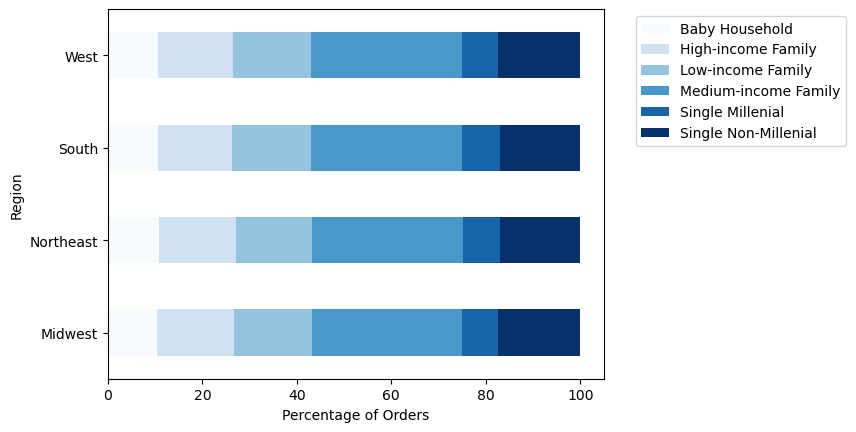

In [79]:
# Create bar chart to show the relationship between customer profiles and different U.S. regions

colors = plt.cm.Blues(np.linspace(0, 1, 6))
bar_profile_region = crosstab_region_prop.plot(kind = 'barh', stacked = True, color = colors)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel("Percentage of Orders")
plt.ylabel("Region")

In [80]:
# Export bar chart

bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_region.png'), bbox_inches='tight')

Text(0.5, 1.0, 'Percentage of Orders by Profile')

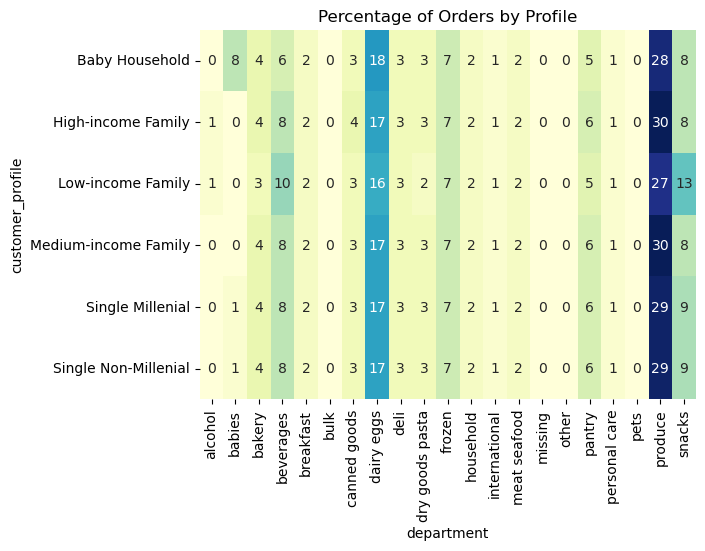

In [81]:
# Create heatmap to show the relationship between customer profiles and departments

heatmap_profile_department = sns.heatmap(pd.crosstab(index = df_merged['customer_profile'], columns = df_merged['department'], normalize = "index").mul(100).round(0), cmap="YlGnBu", 
            annot=True, cbar=False)
heatmap_profile_department.set_title('Percentage of Orders by Profile')

### The charts support the conclusions made earlier in the analysis (Step 8).

In [82]:
# Export heatmap

heatmap_profile_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_profile_department.png'), bbox_inches='tight')

# Step 10. Export the final data set

In [83]:
# Export the merged dataframe in pickle format

df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_profiled.pkl'))